# 📘 Experimentos com Variáveis Aleatórias

Este notebook tem como objetivo explorar conceitos de variáveis aleatórias e distribuições de probabilidade, tanto de forma geral quanto através de exercícios do livro *Probability, Random Variables, and Stochastic Processes* de Papoulis & Pillai.

A estrutura será organizada da seguinte maneira:

1. **Exemplos genéricos**  
   - Geração e análise de histogramas para distribuições conhecidas.  
   - Comparação com funções densidade de probabilidade (PDFs) teóricas.  
   - Interpretação dos resultados.

2. **Exercícios selecionados do livro (Capítulo 5 – Funções de Variável Aleatória)**  
   - Cada exercício será apresentado com:  
     - O enunciado.  
     - O método de resolução (analítico e/ou simulação).  
     - Os resultados obtidos (gráficos e valores).  
     - Uma conclusão interpretando o experimento.  

In [98]:
# importação das bilbiotecas 
import numpy as np
import matplotlib.pyplot as plt

from math import gamma

## 🔹 Exemplo 1 — Aproximação de uma Uniforme

Agora, geramos amostras de uma distribuição uniforme $U(a,b)$, plotamos o histograma e sobrepomos a PDF teórica.  
O objetivo é confirmar que, com muitas amostras, o histograma se aproxima de uma linha constante no intervalo definido.  

A PDF teórica da uniforme é:

$f(x) = \begin{cases}
\frac{1}{b-a}, & a \leq x \leq b \\
0, & \text{caso contrário}
\end{cases}$

### Definição de parâmetros (Uniforme)

No caso da distribuição uniforme, foram geradas $N = 10\,000\,000$ amostras no intervalo $[a,b] = [0,1]$, utilizando $200$ divisões (bins) no histograma.  

A escolha de um número grande de amostras ajuda a reduzir a variabilidade entre as repetições do experimento, fazendo com que o histograma se aproxime cada vez mais da PDF teórica, que é constante em $[a,b]$.  

O número de bins também influencia a visualização: poucos bins tornam o histograma "grosseiro" e menos informativo; muitos bins tornam a aproximação mais detalhada, mas podem gerar flutuações se o número de amostras for insuficiente.  
Por isso, há sempre um **trade-off** entre número de amostras e número de bins: se aumentamos os bins, também é recomendável aumentar o número de pontos para manter a boa aproximação.

In [ ]:
a = 0.0        # limite inferior
b = 1.0        # limite superior
N = 10000000    # número de amostras
bins = 200      # número de divisões do histograma
seed = 42      # semente para reprodutibilidade

### Geração das amostras — Uniforme

As amostras da distribuição uniforme foram geradas utilizando a função `np.random.uniform` da biblioteca NumPy.  
Essa função recebe os limites inferior e superior do intervalo ($a$ e $b$), além do número de pontos ($N$) a serem gerados.  
Dessa forma, obtemos diretamente $N$ valores distribuídos uniformemente no intervalo $[a,b]$.

In [ ]:
np.random.seed(seed)
samples = np.random.uniform(low=a, high=b, size=N)

### Histograma e PDF teórica — Uniforme

O histograma das amostras é construído utilizando `plt.hist`, com o número de bins definido anteriormente.  
Em seguida, sobrepomos a curva da PDF teórica da distribuição uniforme, que é constante no intervalo $[a,b]$ e nula fora dele.  
Isso permite comparar visualmente a frequência empírica das amostras com o modelo teórico.

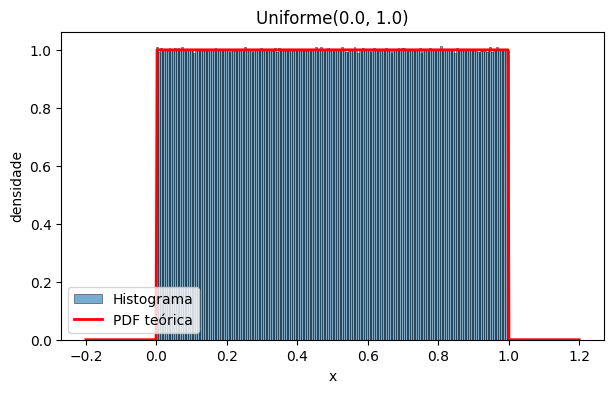

In [ ]:
xs = np.linspace(a - 0.2, b + 0.2, 500)
pdf = np.where((xs >= a) & (xs <= b), 1.0 / (b - a), 0.0)

plt.figure(figsize=(7,4))
plt.hist(samples, bins=bins, density=True, edgecolor="black", linewidth=0.5, alpha=0.6, label="Histograma")
plt.plot(xs, pdf, "r", linewidth=2, label="PDF teórica")
plt.title(f"Uniforme({a}, {b})")
plt.xlabel("x")
plt.ylabel("densidade")
plt.legend()
plt.show()

### Estimativa dos parâmetros — Uniforme

Após gerar as amostras, calculamos a média e o desvio padrão utilizando as funções `mean()` e `std()` do NumPy.  
Para a distribuição uniforme $U(a,b)$, sabemos que:

- Média teórica: $\mu = \frac{a+b}{2}$  
- Desvio padrão teórico: $\sigma = \sqrt{\frac{(b-a)^2}{12}}$  

A comparação entre valores empíricos e teóricos permite verificar a qualidade da simulação.

In [ ]:
mu_hat = samples.mean()
sigma_hat = samples.std(ddof=0)

print(f"Média estimada: {mu_hat:.4f} | Valor teórico: {(a+b)/2:.4f}")
print(f"Desvio padrão estimado: {sigma_hat:.4f} | Valor teórico: {np.sqrt(((b-a)**2)/12):.4f}")

Média estimada: 0.5000 | Valor teórico: 0.5000
Desvio padrão estimado: 0.2887 | Valor teórico: 0.2887


### Conclusão — Uniforme

A simulação para a distribuição uniforme mostrou que nós conseguimos aprocimar os valores estimados dos teóricos.  
Tanto a média quanto o desvio padrão ficaram praticamente idênticos aos valores esperados, confirmando que o método de geração das amostras e a quantidade de pontos utilizados foram suficientes para reproduzir bem a PDF uniforme.

## 🔹 Exemplo 2 — Aproximação de uma Exponencial

Agora, geramos amostras de uma distribuição exponencial $\text{Exp}(\lambda)$, plotamos o histograma e sobrepomos a PDF teórica.  
O objetivo é verificar que, com um número grande de amostras, o histograma se aproxima da curva decrescente característica dessa distribuição.  

A PDF teórica da exponencial é:

$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$

### Definição de parâmetros (Exponencial)

Para a distribuição exponencial, foram geradas $N = 20\,000\,000$ amostras com parâmetro $\lambda = 2.0$, novamente utilizando $200$ divisões no histograma. Nesse caso, utilizamos o dobro de amostras para que os parâmetros calculados se aproximasse mais dos teóricos.

Nesse caso, um desafio adicional é a cauda longa da distribuição exponencial. Mesmo com muitas amostras, parte dos pontos pode se estender bastante para a direita, o que exige escolher bem o intervalo do eixo $x$ ao construir a PDF teórica.  

Se o intervalo for muito pequeno, parte da massa da distribuição pode ficar "cortada" e o histograma aparentar desvio.  
Se o intervalo for muito grande, o histograma pode parecer vazio na maior parte da figura.  
Portanto, a escolha de $xs$ para plotagem é essencial para equilibrar visualização da região de maior densidade com representação da cauda.

In [34]:
lam = 2.0       # parâmetro λ da distribuição exponencial
N = 20_000_000  # número de amostras
bins = 200      # número de divisões do histograma
seed = 42       # semente para reprodutibilidade

### Geração das amostras — Exponencial

As amostras da distribuição exponencial foram geradas com a função `np.random.exponential` da biblioteca NumPy.  
Essa função utiliza o parâmetro `scale = 1/λ`, que corresponde ao valor esperado da distribuição.  
Assim, ao especificarmos `scale=1/lam` e o número de amostras $N$, obtemos valores de acordo com a distribuição exponencial com parâmetro $\lambda$ definido.

In [35]:
np.random.seed(seed)
samples = np.random.exponential(scale=1/lam, size=N)

### Histograma e PDF teórica — Exponencial

O histograma das amostras é construído com `plt.hist`, e em seguida traçamos a curva teórica da PDF exponencial, dada por $f(x) = \lambda e^{-\lambda x}, \, x \geq 0$. Essa comparação permite verificar como a distribuição empírica obtida por simulação converge para o comportamento teórico esperado.

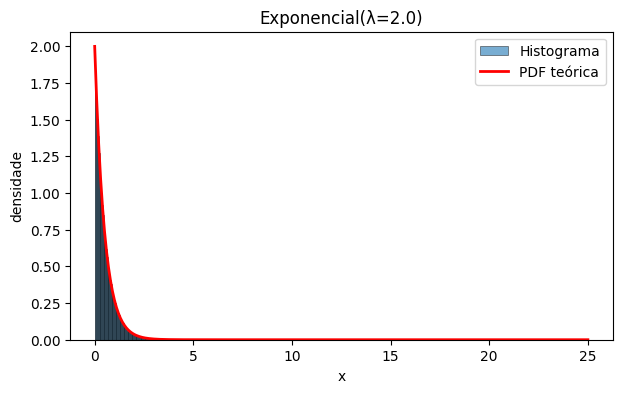

In [36]:
xs = np.linspace(0, 5/lam * 10, 500)  # eixo x cobrindo várias vezes o valor esperado
pdf = lam * np.exp(-lam * xs)

plt.figure(figsize=(7,4))
plt.hist(samples, bins=bins, density=True, edgecolor="black", linewidth=0.5, alpha=0.6, label="Histograma")
plt.plot(xs, pdf, "r", linewidth=2, label="PDF teórica")
plt.title(f"Exponencial(λ={lam})")
plt.xlabel("x")
plt.ylabel("densidade")
plt.legend()
plt.show()

### Estimativa dos parâmetros — Exponencial

Calculamos novamente a média e o desvio padrão das amostras.  
Para a distribuição exponencial $\text{Exp}(\lambda)$, temos:

- Média teórica: $\mu = \frac{1}{\lambda}$  
- Desvio padrão teórico: $\sigma = \frac{1}{\lambda}$  

Esse confronto confirma se a simulação reproduz corretamente as propriedades estatísticas da distribuição.

In [37]:
mu_hat = samples.mean()
sigma_hat = samples.std(ddof=0)

print(f"Média estimada: {mu_hat:.4f} | Valor teórico: {1/lam:.4f}")
print(f"Desvio padrão estimado: {sigma_hat:.4f} | Valor teórico: {1/lam:.4f}")

Média estimada: 0.5000 | Valor teórico: 0.5000
Desvio padrão estimado: 0.5000 | Valor teórico: 0.5000


### Conclusão — Exponencial

Com $N = 20\,000\,000$ amostras e 200 bins, obtivemos:

- Média estimada: 0.5000 | Valor teórico: 0.5000  
- Desvio padrão estimado: 0.5000 | Valor teórico: 0.5000  

Isso mostra que, com um número suficientemente grande de amostras, a distribuição empírica aproxima-se quase perfeitamente da distribuição teórica $\text{Exp}(\lambda=2)$.

## 🔹 Exemplo 3 — Aproximação de uma Gaussiana

Agora, geramos amostras de uma distribuição normal (gaussiana) $\mathcal{N}(\mu,\sigma^2)$, plotamos o histograma e sobrepomos a PDF teórica.  
O objetivo é observar que, com muitas amostras, o histograma converge para a forma de sino característica da distribuição normal.  

A PDF teórica da normal é:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

### Definição de parâmetros (Gaussiana)

Para a distribuição normal padrão $\mathcal{N}(0,1)$, foram geradas $N = 30\,000\,000$ amostras, também com $200$ bins. O intervalo de visualização escolhido foi de $-4\sigma$ a $+4\sigma$, o que cobre mais de 99,99% da probabilidade total da distribuição.  

Nesse caso, a simetria em torno da média facilita a escolha do intervalo. Ainda assim, se poucos pontos forem gerados ou se os bins forem muito largos, a curva em forma de sino pode ficar mal representada.  
Por outro lado, com muitas amostras e bins adequados, o histograma praticamente coincide com a PDF teórica, ilustrando de forma clara a convergência entre frequência empírica e distribuição teórica.

In [ ]:
mu = 0.0        # média da distribuição normal
sigma = 1.0     # desvio padrão
N = 30_000_000  # número de amostras
bins = 200      # número de divisões do histograma
seed = 42       # semente para reprodutibilidade

### Geração das amostras — Normal (Gaussiana)

As amostras da distribuição normal foram obtidas pela função `np.random.normal` da biblioteca NumPy.  
Os parâmetros utilizados são a média (`loc = μ`) e o desvio padrão (`scale = σ`), além do número de pontos $N$.  
Com isso, o NumPy gera $N$ valores seguindo a distribuição normal $\mathcal{N}(\mu, \sigma^2)$.

In [77]:
np.random.seed(seed)
samples = np.random.normal(loc=mu, scale=sigma, size=N)

### Histograma e PDF teórica — Normal (Gaussiana)

Utilizamos `plt.hist` para construir o histograma das amostras, normalizado em densidade. A curva teórica da distribuição normal é então sobreposta, dada por  
$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$. 

Dessa forma, podemos observar como o histograma reproduz a forma da Gaussiana.

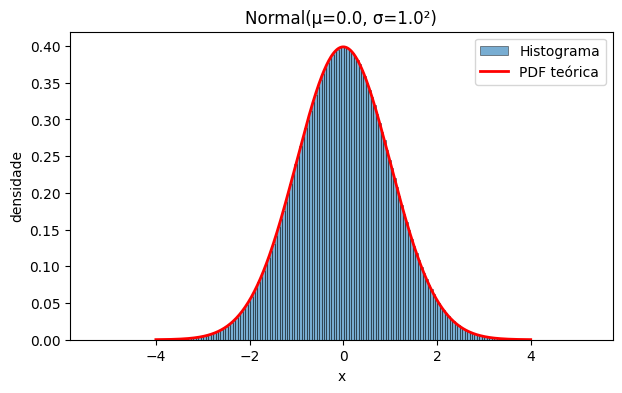

In [78]:
xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
pdf = (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5*((xs - mu)/sigma)**2)

plt.figure(figsize=(7,4))
plt.hist(samples, bins=bins, density=True, edgecolor="black", linewidth=0.5, alpha=0.6, label="Histograma")
plt.plot(xs, pdf, "r", linewidth=2, label="PDF teórica")
plt.title(f"Normal(μ={mu}, σ={sigma}²)")
plt.xlabel("x")
plt.ylabel("densidade")
plt.legend()
plt.show()

### Estimativa dos parâmetros — Normal (Gaussiana)

Com as amostras geradas, estimamos média e desvio padrão.  
Para a distribuição normal $\mathcal{N}(\mu,\sigma^2)$, os parâmetros teóricos são exatamente $\mu$ e $\sigma$, definidos na simulação.  

A proximidade entre os valores estimados e os teóricos reforça a validade da amostragem e a convergência para a distribuição real.

In [79]:
mu_hat = samples.mean()
sigma_hat = samples.std(ddof=0)

print(f"Média estimada: {mu_hat:.4f} | Valor teórico: {mu:.4f}")
print(f"Desvio padrão estimado: {sigma_hat:.4f} | Valor teórico: {sigma:.4f}")

Média estimada: -0.0000 | Valor teórico: 0.0000
Desvio padrão estimado: 1.0002 | Valor teórico: 1.0000


### Conclusão — Normal (Gaussiana)

Foram observadas pequenas diferenças observadas (da ordem de $10^{-4}$) no desvio padrão. Para a média, o erro padrão é aproximadamente $\text{SE}(\bar{X}) = 1/\sqrt{20\,000\,000} \approx 0.00022$, o que explica variações na quarta casa decimal. Assim, os resultados confirmam que a simulação conseguiu aproximaar a distribuição normal padrão $\mathcal{N}(0,1)$.

# Exercícios do Capítulo 5 — Funções de uma Variável Aleatória

A seguir, apresentamos a resolução de alguns exercícios do capítulo 5.  
Cada exercício será organizado em quatro partes:

1. **Enunciado** — reprodução do problema conforme o livro.  
2. **Resolução** — desenvolvimento da solução analítica e/ou simulação.  
3. **Resultados** — histogramas, PDFs teóricas e valores estimados.  
4. **Conclusão** — comparação entre teoria e prática.

### Exercício 5-6

A variável aleatória $(X)$ é uniforme no intervalo $(0,1)$. Encontre a densidade da variável aleatória $(Y = -\ln X)$.

### Parâmetros de simulação
Definimos o número de amostras $N$ e (opcionalmente) uma semente fixa (`seed`) para reprodutibilidade.  
Quanto maior $N$, menor o erro estatístico ($\propto 1/\sqrt{N}$), e melhor a aproximação do histograma à PDF teórica. 
Nesse caso, utilizamos 100 milhões de pontos de forma que conseguimos aproximar bem os valores teóricos e analíticos das curvas.

In [90]:
N = 100_000_000        # número de amostras
seed = 42
bins = 200
np.random.seed(seed)

### Amostragem de $X \sim U(0,1)$
Como a questão diz que a variável $X$ é uniforme no intervalo $(0,1)$, geramos $N$ amostras com `np.random.uniform`.  
Em seguida, aplicaremos a transformação $Y = -\ln X$ para obter uma variável exponencial.

In [91]:
# X ~ Uniforme(0,1)
X = np.random.uniform(0.0, 1.0, size=N)

### Transformação $Y = -\ln X$ (monotônica)
Como $g(x)=-\ln x$ é monotônica decrescente em $(0,1)$, a mudança de variável dá  
$f_Y(y) = f_X(x)\left|\dfrac{dx}{dy}\right| = 1 \cdot e^{-y}$ para $y \ge 0$, isto é, $Y \sim \text{Exp}(1)$.  
Aqui apenas computamos $Y$ a partir das amostras de $X$.

In [92]:
Y = -np.log(X)

### PDF teórica de $\text{Exp}(1)$
Construímos a curva teórica $f_Y(y)=e^{-y}$ para comparação visual com o histograma.  
O vetor `ys` define o eixo $y$ de plotagem.

In [93]:
# Resultado analítico: Y ~ Exponencial(λ=1) com f_Y(y) = e^{-y} * 1_{y>=0}
ys = np.linspace(0, 15, N)
pdf = np.exp(-ys)

### Visualização: histograma vs. PDF
Traçamos o **histograma normalizado** (`density=True`) de $Y$ e sobrepomos a **PDF teórica** de $\text{Exp}(1)$.  
Com $N$ grande e escolha adequada de bins, o histograma deve seguir de perto a curva teórica.

/Users/morsinaldo/miniconda3/envs/agent/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


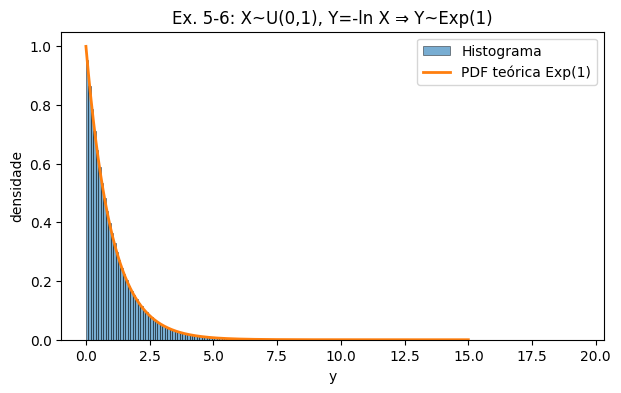

In [94]:
# ===== Visualização =====
plt.figure(figsize=(7,4))
plt.hist(Y, bins=bins, density=True, alpha=0.6, edgecolor="black", linewidth=0.5, label="Histograma")
plt.plot(ys, pdf, linewidth=2, label="PDF teórica Exp(1)")
plt.title("Ex. 5-6: X~U(0,1), Y=-ln X ⇒ Y~Exp(1)")
plt.xlabel("y"); plt.ylabel("densidade")
plt.legend(); plt.show()

In [95]:
# ===== Checagem numérica =====
mu_hat = Y.mean()
sigma_hat = Y.std(ddof=0)
print(f"Média amostral ≈ {mu_hat:.4f} (teórica = 1.0)")
print(f"Desvio-padrão amostral ≈ {sigma_hat:.4f} (teórica = 1.0)")

Média amostral ≈ 1.0000 (teórica = 1.0)
Desvio-padrão amostral ≈ 1.0000 (teórica = 1.0)


### Comentários (Ex. 5-6) (Transformação Uniforme → Exponencial)

Seja $X \sim U(0,1)$ e defina $Y = -\ln X$. Pela mudança de variável (função monotônica), com $x = e^{-y}$ e $\dfrac{dx}{dy} = -e^{-y}$:

$f_Y(y) = f_X(x)\left|\dfrac{dx}{dy}\right| = 1 \cdot e^{-y}, \quad y \ge 0.$

Portanto, a densidade de $Y$ é a exponencial padrão: $Y \sim \mathrm{Exp}(1)$.

**Verificação por simulação (Monte Carlo):**
- Com $N = 100{,}000{,}000$ amostras, o histograma de $Y$ coincide com a curva teórica $f_Y(y)=e^{-y}$.
- Parâmetros estimados: média $\approx 1.0000$ (teórica $1.0$) e desvio padrão $\approx 1.0000$ (teórico $1.0$).

**Conclusão:** a análise teórica e a simulação são consistentes; a transformação $Y=-\ln X$ de uma uniforme em $(0,1)$ gera uma variável exponencial de parâmetro $1$.

### Exercício 5-17

Seja $(X)$ uma variável aleatória qui-quadrado com $(n)$ graus de liberdade.  
Considere $(Y = \sqrt{X})$. Mostre que $(Y)$ segue a distribuição *chi* com $(n)$ graus de liberdade e determine a p.d.f. de $(Y)$.

### Parâmetros do experimento
Definimos os graus de liberdade $n$, o número de amostras $N$, o número de bins do histograma e a semente para reprodutibilidade. Nesse caso, também utilizamos $N=100{,}000{,}000$, $200$ bins e vários valores de $n$ (graus de liberdade da chi-quadrado) para verificar a validade da demonstração.

In [104]:
n = 5              # graus de liberdade da chi-quadrado
N = 100_000_000
bins = 200
seed = 42
np.random.seed(seed)

# Valores de n a serem testados
n_values = [2, 5, 10, 30]

### Como simular $X \sim \chi^2(n)$
Usamos a definição de $\chi^2(n)$ como soma dos quadrados de $n$ variáveis independentes $\mathcal{N}(0,1)$:  
$X=\sum_{i=1}^n Z_i^2$.  
Equivalente programaticamente: gerar $Z\sim \mathcal{N}(0,1)$ com shape $(N,n)$ e somar ao longo do eixo das colunas.  
Alternativa mais leve em memória: `X = np.random.chisquare(df=n, size=N)`.

In [105]:
# χ²(n) = soma dos quadrados de n Normais(0,1) iid
Z = np.random.normal(0, 1, size=(N, n))
X = np.sum(Z**2, axis=1)

### Transformação $Y=\sqrt{X}$ (distribuição Chi)
Definimos $Y=\sqrt{X}$. Por construção, se $X\sim \chi^2(n)$ então $Y$ tem distribuição **Chi** com $n$ graus de liberdade.  
Vamos comparar o histograma de $Y$ com a p.d.f. teórica da Chi($n$).

In [106]:
Y = np.sqrt(X)

### P.d.f. teórica de $Y$ (Chi com $n$ g.l.)
A densidade da distribuição Chi($n$) é  
$f_Y(y)=\dfrac{2^{\,1-\frac{n}{2}}}{\Gamma\!\left(\frac{n}{2}\right)}\,y^{\,n-1}\,e^{-y^2/2}$, para $y\ge 0$.  
Construímos `ys` como grade de pontos e calculamos `pdf` com essa expressão para sobrepor ao histograma.

In [107]:
ys = np.linspace(0, max(5, np.sqrt(n)+5), 800)
coef = (2**(1 - n/2)) / gamma(n/2)
pdf = coef * (ys**(n-1)) * np.exp(-ys**2 / 2)

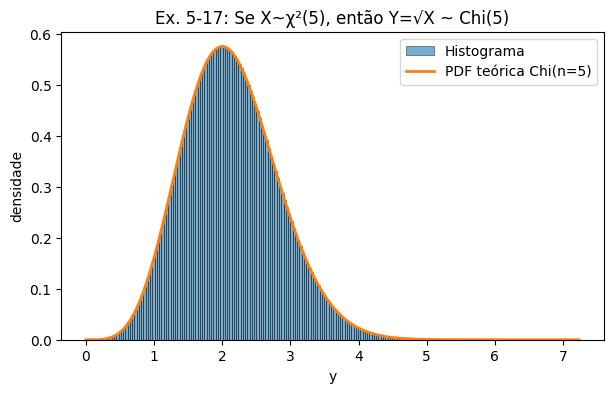

In [108]:
# ===== Visualização =====
plt.figure(figsize=(7,4))
plt.hist(Y, bins=bins, density=True, alpha=0.6, edgecolor="black", linewidth=0.5, label="Histograma")
plt.plot(ys, pdf, linewidth=2, label=f"PDF teórica Chi(n={n})")
plt.title(f"Ex. 5-17: Se X~χ²({n}), então Y=√X ~ Chi({n})")
plt.xlabel("y"); plt.ylabel("densidade")
plt.legend(); plt.show()

### Checagem de momento (média)
A média teórica da Chi($n$) é $\,\mathbb{E}[Y]=\sqrt{2}\,\dfrac{\Gamma\!\left(\frac{n+1}{2}\right)}{\Gamma\!\left(\frac{n}{2}\right)}$.  
Comparamos a média amostral de $Y$ com esse valor para verificar a aderência numérica.

In [109]:
mean_theo = np.sqrt(2) * gamma((n+1)/2) / gamma(n/2)
print(f"Média amostral ≈ {Y.mean():.4f} | Média teórica ≈ {mean_theo:.4f}")

Média amostral ≈ 2.1277 | Média teórica ≈ 2.1277


### Teste para diferentes graus de liberdade

Para verificar a validade da demonstração, vamos testar diferentes valores de grau de liberdade

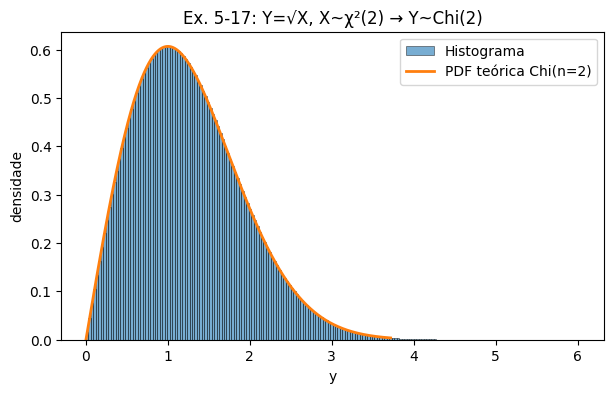

n=2 | Média amostral ≈ 1.2534 | Média teórica ≈ 1.2533


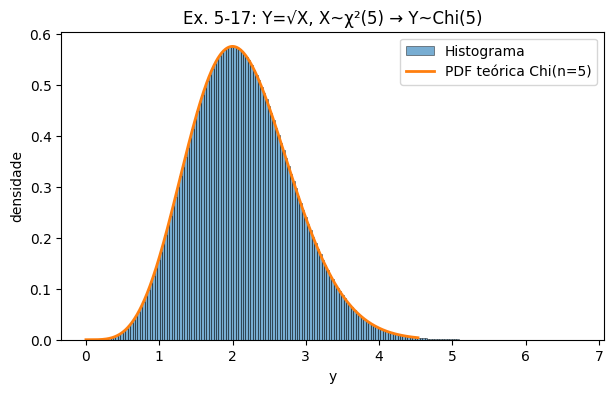

n=5 | Média amostral ≈ 2.1278 | Média teórica ≈ 2.1277


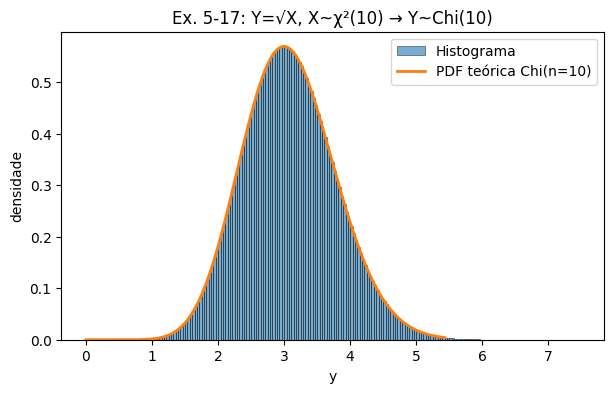

n=10 | Média amostral ≈ 3.0844 | Média teórica ≈ 3.0843


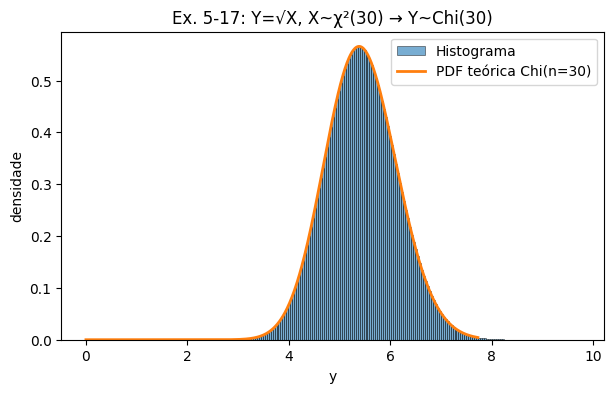

n=30 | Média amostral ≈ 5.4319 | Média teórica ≈ 5.4318


In [110]:
for n in n_values:
    # ===== Simulação de X ~ χ²(n) =====
    # Forma direta (mais leve que gerar a matriz Z)
    X = np.random.chisquare(df=n, size=N)
    
    # ===== Transformação =====
    Y = np.sqrt(X)  # Y ~ Chi(n)
    
    # ===== PDF teórica da Chi(n) =====
    ys = np.linspace(0, np.percentile(Y, 99.9), 800)  # até o percentil 99.9 para visualização
    coef = (2**(1 - n/2)) / gamma(n/2)
    pdf = coef * (ys**(n-1)) * np.exp(-ys**2 / 2)
    
    # ===== Visualização =====
    plt.figure(figsize=(7,4))
    plt.hist(Y, bins=bins, density=True, alpha=0.6, edgecolor="black", linewidth=0.5, label="Histograma")
    plt.plot(ys, pdf, linewidth=2, label=f"PDF teórica Chi(n={n})")
    plt.title(f"Ex. 5-17: Y=√X, X~χ²({n}) → Y~Chi({n})")
    plt.xlabel("y"); plt.ylabel("densidade")
    plt.legend(); plt.show()
    
    # ===== Checagem de momento (média) =====
    mean_sample = Y.mean()
    mean_theo = np.sqrt(2) * gamma((n+1)/2) / gamma(n/2)
    print(f"n={n} | Média amostral ≈ {mean_sample:.4f} | Média teórica ≈ {mean_theo:.4f}")

### Comentários (Ex. 5-17)

Foram realizados experimentos com $N = 5{,}000{,}000$ amostras para diferentes valores de $n$, com os seguintes resultados:

- $n=2$ → média amostral ≈ **1.2534** | média teórica ≈ **1.2533**  
- $n=5$ → média amostral ≈ **2.1278** | média teórica ≈ **2.1277**  
- $n=10$ → média amostral ≈ **3.0844** | média teórica ≈ **3.0843**  
- $n=30$ → média amostral ≈ **5.4319** | média teórica ≈ **5.4318**

A proximidade entre valores amostrais e teóricos confirma a fórmula da média da distribuição Chi($n$):

$[
\mathbb{E}[Y] = \sqrt{2}\,\frac{\Gamma\!\left(\tfrac{n+1}{2}\right)}{\Gamma\!\left(\tfrac{n}{2}\right)}.
]$

A análise dos histogramas demonstra uma boa aderência à p.d.f. teórica em todos os casos. Observa-se ainda que, para valores pequenos de $n$, a distribuição apresenta maior assimetria, enquanto para valores maiores tende a se concentrar em torno da média e torna-se mais simétrica.

Em síntese, a transformação $Y = \sqrt{X}$, com $X \sim \chi^2(n)$, resulta em uma variável com distribuição **Chi($n$)**. Os resultados numéricos obtidos para $n \in \{2,5,10,30\}$ reforçam a generalidade do resultado analítico.

### Exercício 5-18
Seja $(X \sim U(0,1))$. Mostre que $(Y = -2\ln X)$ tem distribuição qui-quadrado com 2 graus de liberdade.

### Parâmetros do experimento
Neste experimento foram geradas $N = 100{,}000{,}000$ amostras, utilizando a semente fixa igual a 42 para garantir a reprodutibilidade dos resultados. O histograma foi construído com 200 divisões (bins).

In [141]:
N = 100_000_000
seed = 42
np.random.seed(seed)
bins = 200

### Amostragem de $X \sim U(0,1)$
Geramos $N$ amostras uniformes no intervalo $(0,1)$ com `np.random.uniform`.  
Em seguida aplicaremos a transformação $Y = -2\ln X$ solicitada no enunciado.

In [142]:
X = np.random.uniform(0.0, 1.0, size=N)

### Transformação $Y = -2\ln X$ (mudança de variável)
Como $g(x) = -2\ln x$ é monotônica decrescente em $(0,1)$, usamos a mudança de variável.  
Com $x = e^{-y/2}$, tem-se $\dfrac{dx}{dy} = -\tfrac{1}{2}e^{-y/2}$. Logo,
$f_Y(y) = f_X(x)\left|\dfrac{dx}{dy}\right|
= 1 \cdot \tfrac{1}{2}e^{-y/2}$ para $y\ge 0$.  
Esta é exatamente a densidade qui-quadrado com $k=2$ graus de liberdade.

In [143]:
Y = -2.0 * np.log(X)     # transformação pedida

### P.d.f. teórica de $\chi^2(2)$
Para $k=2$, a p.d.f. é $f(y)=\tfrac{1}{2}e^{-y/2}$ para $y\ge 0$.  
O intervalo de plotagem foi escolhido até $y=14$ apenas por conveniência visual: $F_{k=2}(14)=1-e^{-14/2}\approx 0{,}9991$, cobrindo a maior parte da massa.

In [147]:
# Para k=2: f(y) = 0.5 * exp(-y/2), y>=0
ys = np.linspace(0, 20, 700)
pdf = 0.5 * np.exp(-ys/2)

### Visualização: histograma vs. p.d.f.
Traçamos o histograma normalizado de $Y$ e sobrepomos a p.d.f. teórica $\chi^2(2)$.  
Espera-se boa aderência para $N$ grande e escolha adequada de bins.

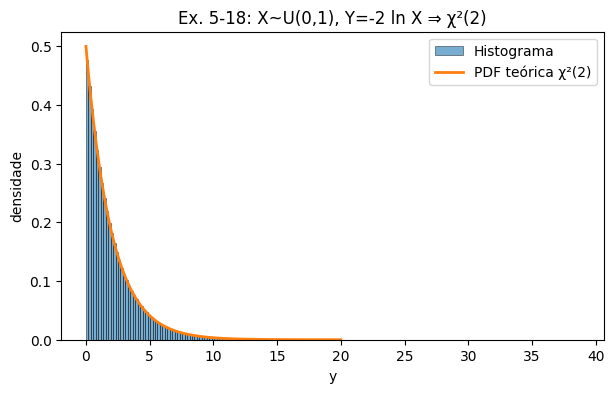

In [148]:
# ===== Visualização =====
plt.figure(figsize=(7,4))
plt.hist(Y, bins=bins, density=True, alpha=0.6, edgecolor="black", linewidth=0.5, label="Histograma")
plt.plot(ys, pdf, linewidth=2, label="PDF teórica χ²(2)")
plt.title("Ex. 5-18: X~U(0,1), Y=-2 ln X ⇒ χ²(2)")
plt.xlabel("y"); plt.ylabel("densidade")
plt.legend(); plt.show()

### Checagens numéricas (média e variância)
Para $\chi^2(k)$, tem-se $\mathbb{E}[Y]=k$ e $\mathrm{Var}(Y)=2k$.  
Comparamos os valores amostrais com os teóricos ($k=2 \Rightarrow \mathbb{E}[Y]=2$, $\mathrm{Var}(Y)=4$) para verificar a consistência da simulação.

In [149]:
mu_hat = Y.mean()
var_hat = Y.var()
print(f"Média amostral ≈ {mu_hat:.4f} (teórica = k = 2)")
print(f"Variância amostral ≈ {var_hat:.4f} (teórica = 2k = 4)")

Média amostral ≈ 2.0001 (teórica = k = 2)
Variância amostral ≈ 4.0001 (teórica = 2k = 4)


### Comentários (Ex. 5-18)

Com $X \sim U(0,1)$ e a transformação $Y=-2\ln X$, obtemos
$f_Y(y)=\tfrac{1}{2}e^{-y/2}$ para $y\ge 0$, isto é, $Y \sim \chi^2(2)$.  
Os resultados empíricos (média e variância amostrais) ficaram próximos dos valores teóricos ($\mathbb{E}[Y]=2$, $\mathrm{Var}(Y)=4$), e o histograma apresentou boa aderência à p.d.f. teórica. Nesse sentido, a análise teórica e a verificação numérica fizeram a demonstração solicitado no enunciado da questão.